# Avocados Analysis

Sklearn can be very useful for data analysis in Python/Jupyter

## Information obtained from Kaggle

#### Project done by Miguel Estrada

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
#Importing the data
data_avocados = pd.read_csv('avocado_ripeness_dataset.csv')
data_avocados.head(2)

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned


In [4]:
data_avocados.color_category.value_counts()

color_category
black         75
purple        75
green         50
dark green    50
Name: count, dtype: int64

In [5]:
data_avocados.ripeness.value_counts()

ripeness
ripe               50
pre-conditioned    50
hard               50
breaking           50
firm-ripe          50
Name: count, dtype: int64

In [7]:
data_avocados.isna().sum()

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64

In [8]:
data_avocados.isnull().sum()

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64

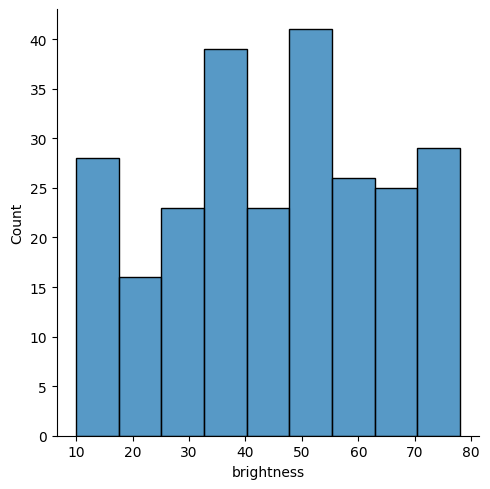

In [10]:
sns.displot(data_avocados['brightness'], kde=False)

<Axes: xlabel='weight_g', ylabel='size_cm3'>

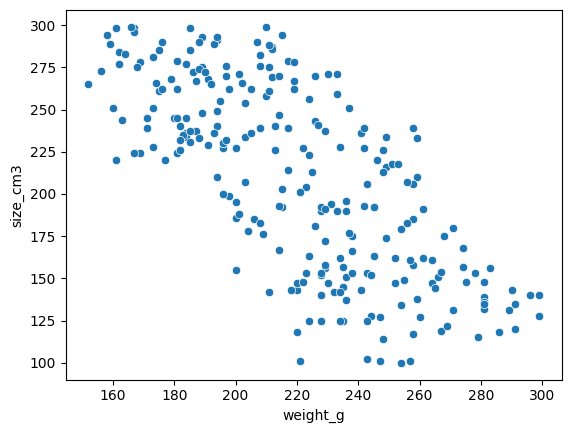

In [12]:
sns.scatterplot(x=data_avocados['weight_g'], y=data_avocados['size_cm3'])

<Axes: xlabel='weight_g', ylabel='brightness'>

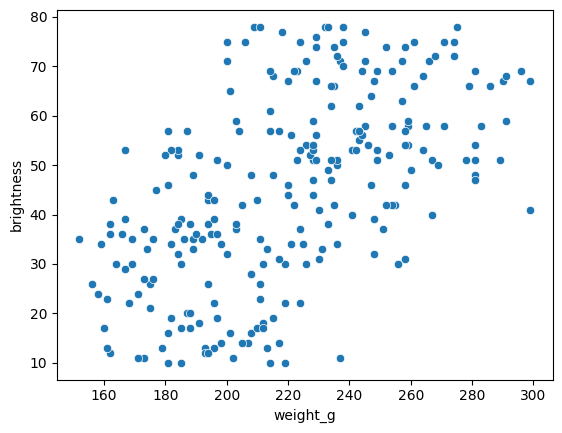

In [13]:
sns.scatterplot(x=data_avocados['weight_g'], y=data_avocados['brightness'])

#### Preparing data for Logistic Regression
Used for predicting the ripeness of the avocado

In [15]:
X = data_avocados.drop('ripeness', axis=1)
Y = data_avocados['ripeness']

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)

X.color_category = labelencoder.fit_transform(X.color_category.values)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [18]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [19]:
classifier = LogisticRegression(fit_intercept=True)
classifier.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
predictions = classifier.predict(x_test)

<Axes: >

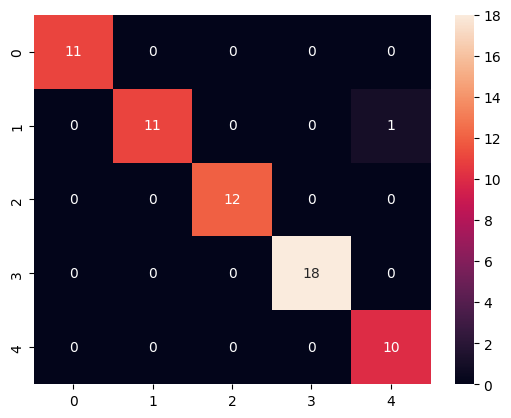

In [21]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

## There is a very big precision due to the correlation in the data

In [23]:
## Accuracy of the model
accuracy_score(y_test, predictions)

0.9841269841269841